Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 1.8736 - accuracy: 0.5167 - val_loss: 0.6754 - val_accuracy: 0.6000
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.8869 - accuracy: 0.4667 - val_loss: 0.7462 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.6466 - accuracy: 0.5500 - val_loss: 0.6529 - val_accuracy: 0.6667
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.5940 - accuracy: 0.6333 - val_loss: 0.6764 - val_accuracy: 0.6667
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.5991 - accuracy: 0.6333 - val_loss: 0.6440 - val_accuracy: 0.6667
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.5461 - accuracy: 0.6333 - val_loss: 0.6300 - val_accuracy: 0.6667
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.5253 - accuracy: 0.8167 - val_loss: 0.6122 - val_accuracy: 0.6667
Epoch 8/20
2/2 [=========================

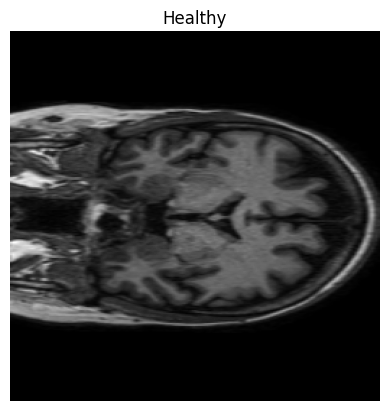

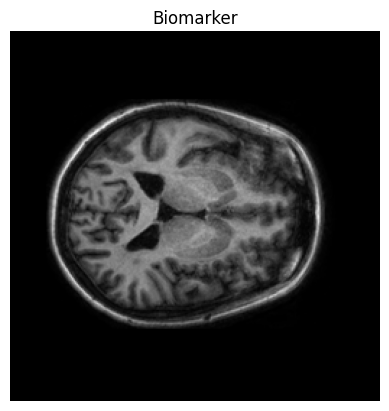

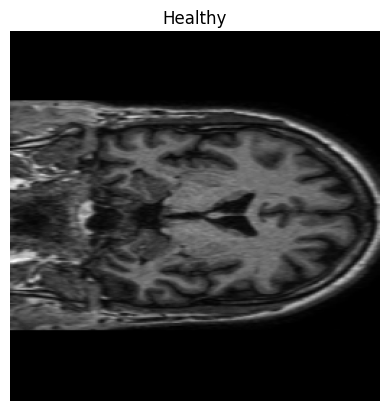

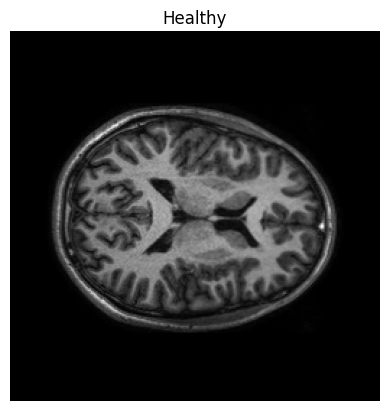

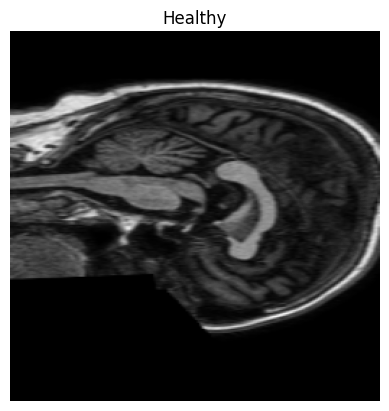

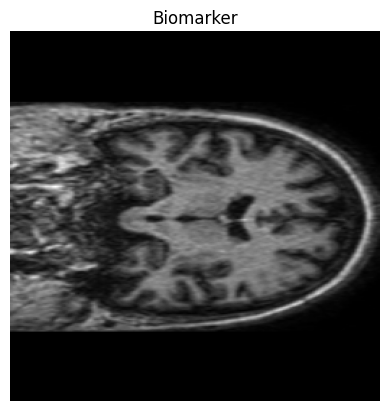

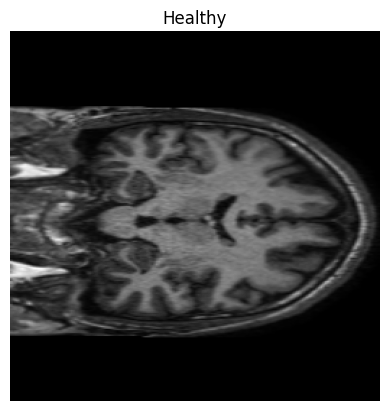

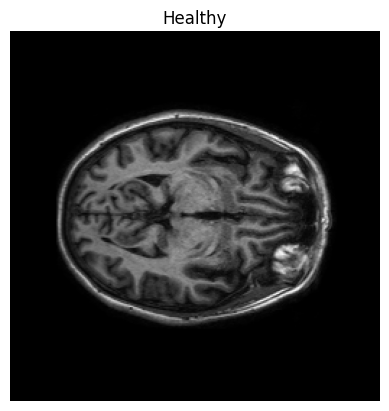

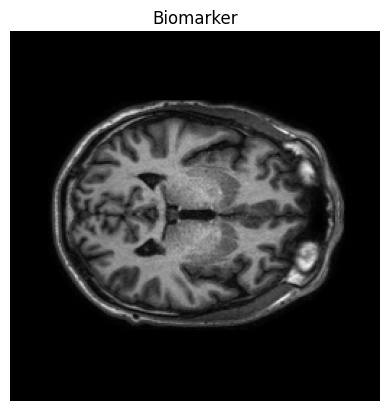

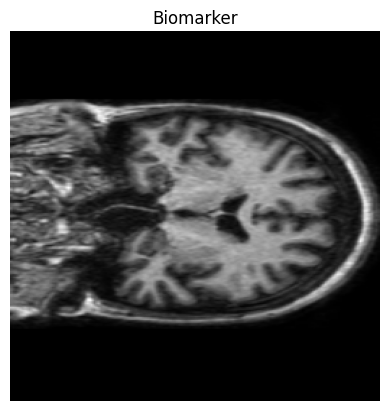

In [19]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Define the dimensions you want for your MRI images
fixed_width = 256  # You can adjust this dimension
fixed_height = 256  # You can adjust this dimension

# Step 2: Load and preprocess MRI images
def load_images_from_directory(directory, fixed_width, fixed_height):
    image_data = []
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        # Resize the image to fixed dimensions
        image = cv2.resize(image, (fixed_width, fixed_height))
        image = image / 255.0  # Normalize the pixel values to [0, 1]
        image_data.append(image)
    return np.array(image_data)

# Define the paths to your directories
healthy_dir = r"C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\anat\control_ses1_anat_2d"
sca2ataxia_dir = r"C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\sca2_dti_cnn\implem\anat\sca2ataxia_ses1_anat_2d"

# Load and preprocess MRI scans
healthy_images = load_images_from_directory(healthy_dir, fixed_width, fixed_height)
sca2ataxia_images = load_images_from_directory(sca2ataxia_dir, fixed_width, fixed_height)

# Step 3: Prepare labels
# You need to define labels for healthy (0) and sca2ataxia (1) images
healthy_labels = np.zeros(len(healthy_images))
sca2ataxia_labels = np.ones(len(sca2ataxia_images))

# Combine data and labels
X = np.concatenate((healthy_images, sca2ataxia_images))
y = np.concatenate((healthy_labels, sca2ataxia_labels))

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(fixed_height, fixed_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Step 7: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Step 7: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Step 8: Visualize the MRI scans and predictions
for i in range(10):  # Adjust the number of examples you want to visualize
    plt.figure()
    plt.imshow(X_test[i].reshape(fixed_height, fixed_width), cmap='gray')
    plt.title("SCA2 ataxia " if y_test[i] == 1 else "Healthy")
    plt.axis('off')
    plt.show()